[1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 

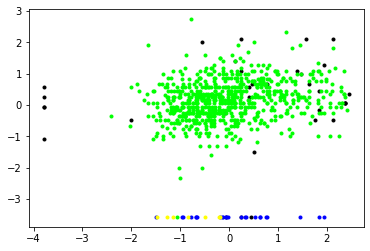

In [2]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
from scipy.io import arff
import queue 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

class CustomDBSCAN:
    
        def __init__(self):
            self.core = -1
            self.border = -2

         # Find all neighbour points at epsilon distance from the point pointId
        def neighbour_points(self, data, pointId, epsilon):
                points = []
                for i in range(len(data)):
                    
                    # Euclidian distance
                    if np.linalg.norm([a_i - b_i for a_i, b_i in zip(data[i], data[pointId])]) <= epsilon:
                        points.append(i)
                return points           
            
        
        # Run the the DBSCAN algo
        def runDbScanAlgo(self, data, Eps, MinPt):
            
            # initialize all points as outliers
            point_label = [0] * len(data)
            
            # contains list of all neighbour points i,e at 1 index [1,2,4,5]; piont 1 is neighbour with 1,2,4,5
            point_count = []

            # initilize list for core/border points
            core = []
            border = []

            # Find the neighbours of each individual point
            for i in range(len(data)):
                point_count.append(self.neighbour_points(data, i, Eps))
                

            # Find all the core points, border points and outliers
            for i in range(len(point_count)):
                if (len(point_count[i]) >= MinPt):
                    point_label[i] = self.core
                    core.append(i)
                else:
                    border.append(i)

            # Differentiate outliers and borders    
            for i in border:
                
                # get the neighbour points
                for j in point_count[i]:
                    
                    # check if any core point is in neighbour if not it is a outlier 
                    if j in core:
                        point_label[i] = self.border
                        break

                        
            # Assign points to a cluster
            cluster = 1

            # Here we use a queue to find all the neighbourhood points of a core point and find the
            # indirectly reachable points.
            # We are essentially performing Breadth First search of all points which are within
            # epsilon distance from each other
            
            for i in range(len(point_label)):
                q = queue.Queue()
                if (point_label[i] == self.core):
                    point_label[i] = cluster
                    
                    for x in point_count[i]:
                        if(point_label[x] == self.core):
                            q.put(x)
                            point_label[x] = cluster
                        elif(point_label[x] == self.border):
                            point_label[x] = cluster
                    while not q.empty():
                        neighbors = point_count[q.get()]
                        for y in neighbors:
                            if (point_label[y] == self.core):
                                point_label[y] = cluster
                                q.put(y)
                            if (point_label[y] == self.border):
                                point_label[y] = cluster
                    cluster += 1  # Move on to the next cluster

            return point_label, cluster  
        
        
        # Visualize the clusters
        def visualize(self, data, cluster, numberOfClusters):
            N = len(data)
            # Define colors
            colors= np.array(['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#96379F', '#A3835A', '#AF0D77'])
            #Red #FF0000, green #00FF00 blue #0000FF yellow #FFFF00 96379F A3835A AF0D77

            for i in range(numberOfClusters):
                if (i == 0):
                    # Plot all outliers point as black
                    color = '#000000'
                else:
                    color = colors[i % len(colors)]

                x, y = [], []
                for j in range(N):
                    if cluster[j] == i:
                        x.append(data[j, 1])
                        y.append(data[j, 2])
                plt.scatter(x, y, c=color, alpha=1, marker='.')
            plt.show()

            
def main():
    data = arff.loadarff('diabetes1.arff')
    df = pd.DataFrame(data[0])
    
    #verify the data
    df.head()
    
    #drop the last column 
    df = df.drop(['class'], axis = 1)
    
    #print(df.head() )
    dataset = df.values.tolist()
    #print(dataset)
    
    #datasetA= df.values
    
    #print(dataset.shape)
    #print(len(dataset[0]))
    #print(len(datasetA))
    
    # normalize dataset
    x = StandardScaler().fit_transform(dataset)
    
    
    #print(x)
    custom_DBSCAN = CustomDBSCAN()
    
    #2=eps, minpoints = 5 
    point_labels, clusters = custom_DBSCAN.runDbScanAlgo(x, 2, 5)
    print(point_labels)
    print("No of clusters:",clusters)
    print("Outliners are in black")
    
    # just a grap to visualize,
    custom_DBSCAN.visualize(x, point_labels, clusters)

main()    